# Using Data Science to Understand What Makes Wine Taste Good

## Section 1: Data Exploration

In this section, we'll do some exploratory analysis to understand the nature of our data and the underlying distribution.

### First, import some necessary libraries. 

### Click the below cell block and run it.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames

import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

### Next, we'll load the dataset for white wines, and display the first 5 columns. Run the below cell block

In [2]:
# Load the Red Wines dataset
data = pd.read_csv("winequality-white.csv", sep=';')

# Display the first five records
display(data.head(n=5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Now, let's do some basic preliminary analysis of our data:

### We'll begin by first seeing if our data has any missing information

In [17]:
# buscar nulos
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

# Ninguna columna tiene nulos. Se verifica también en la sección siguiente

Series([], dtype: float64)

### Examine the features in the data-set and their data types

In [15]:
# informaci�n de tipos de variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [22]:
# analitica descriptiva b�sica
data.describe()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [23]:
data['quality'].value_counts(sort=True)

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

# Section 2: Exploring Relationships between features

In [6]:
# Explorar las relaciones entre variables

In [24]:
# Matriz de correlaciones
# sugerencia 2: sns.heatmap()

correlation = data.corr()
correlation.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Observamos que quality está correlado positivamente con:
alcohol

Y negativamente con:
density
chlorides
total sulfur dioxide
volatile acidity
fixed acidity

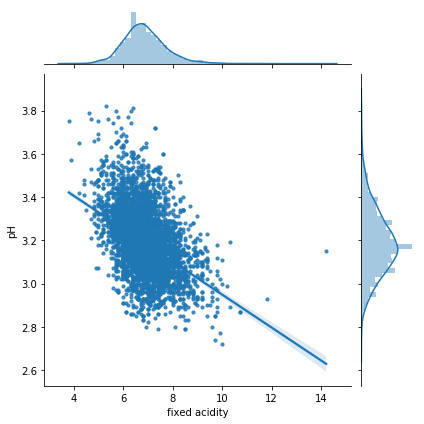

In [25]:
import seaborn as sns
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = data[['pH', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)


#### Citric_acid and fixed acidity

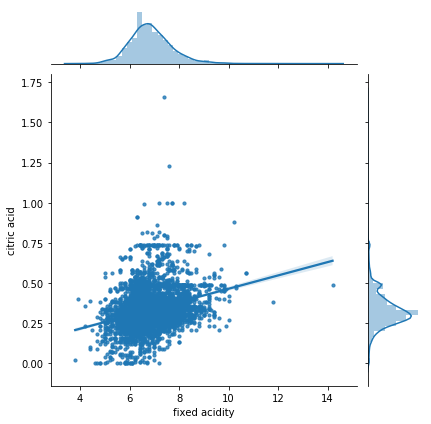

In [28]:
fixedAcidity_citricAcid = data[['citric acid', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="citric acid", data=fixedAcidity_citricAcid, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

#### density and fixed acidity

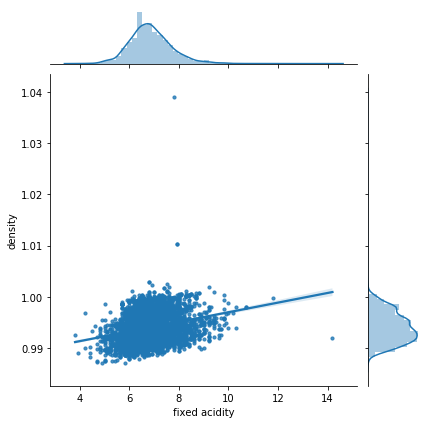

In [30]:
fixedAcidity_density = data[['density', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="density", data=fixedAcidity_density, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

#### quality and volatile acidity

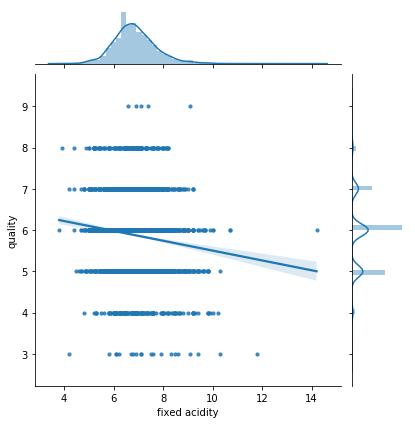

In [31]:
fixedAcidity_quality = data[['quality', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="quality", data=fixedAcidity_quality, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

#### alcohol and quality

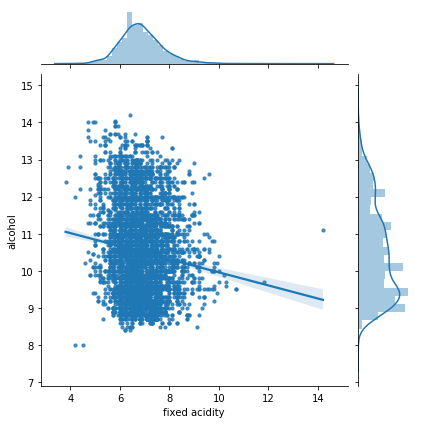

In [32]:
fixedAcidity_alcohol = data[['alcohol', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="alcohol", data=fixedAcidity_alcohol, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

#### Barplot quality and volatile acidity

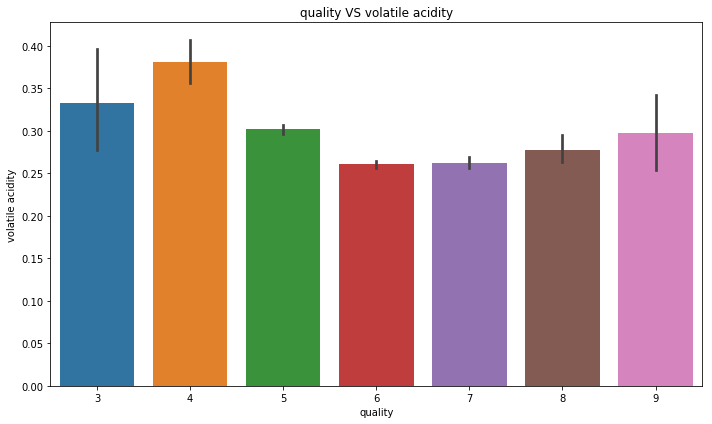

<Figure size 432x288 with 0 Axes>

In [34]:
#We can visualize relationships of discreet values better with a bar plot

volatileAcidity_quality = data[['volatile acidity', 'quality']]

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=volatileAcidity_quality, ax=axs)
plt.title('quality VS volatile acidity')

plt.tight_layout()
plt.show()
plt.gcf().clear()

#### Barplot quality and alcohol

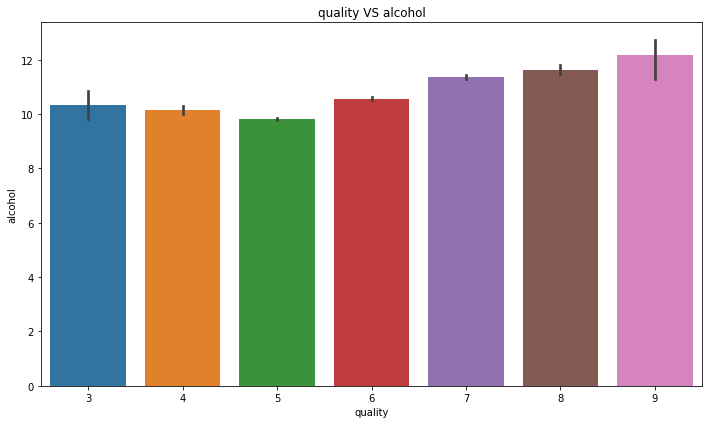

<Figure size 432x288 with 0 Axes>

In [35]:
alcohol_quality = data[['alcohol', 'quality']]

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=alcohol_quality, ax=axs)
plt.title('quality VS alcohol')

plt.tight_layout()
plt.show()
plt.gcf().clear()

## Outlier Detection:

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An **outlier step** is calculated as **1.5** times the **interquartile range (IQR)**. A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below:

* Assign the value of the 25th percentile for the given feature to Q1. Use np.percentile for this.
* Assign the value of the 75th percentile for the given feature to Q3. Again, use np.percentile.
* Assign the calculation of an outlier step for the given feature to step.
* Optionally remove data points from the dataset by adding indices to the outliers list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!
Once you have performed this implementation, the dataset will be stored in the variable good_data.

In [50]:
# For each feature find the data points with extreme high or low values

outliers=[]

for feature in data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    # Display the outliers
    #print("Data points considered outliers for the feature '{}':".format(feature))
    #display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
    aux = ~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))
    
    upper,lower=Q3+step,Q1-step
    
# OPTIONAL: Select the indices for data points you wish to remove
# Remove the outliers, if any were specified

    #print (feature)
    #print (lower,upper)
    outliers=outliers+ (data[(data[feature]>=upper)|(data[feature]<=lower)].index.tolist())
    
good_data = data.drop(data.index[outliers]).reset_index(drop = True)

outliers=set(outliers)

print ('Datos originales:'+str(len(data)))
print ('Outliers:'+ str(len(outliers)))
print ('Datos sin outliers:'+str(len(good_data)))





    

Datos originales:4898
Outliers:1061
Datos sin outliers:3837


# Part 2: Using Machine Learning to Predict the Quality of Wines

In [56]:
#Displays the first 2 columns
display(good_data.head(n=5))
# Split the data into features and target label
features=good_data.drop(columns="quality")
target=good_data['quality']

display(features.head(n=5))

display(target.head(n=5))




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

### Next, shuffle and split our data-set into training and testing subsets:

In [59]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=417)


# Show the results of the split

display (X_train.head(n=5))
display (y_train.head(n=5))





,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1384,7.7,0.30,0.42,14.3,0.045,45.0,213.0,0.99910,3.18,0.63,9.2
387,7.1,0.23,0.39,1.6,0.032,12.0,65.0,0.98980,3.25,0.40,12.7
66,6.1,0.27,0.43,7.5,0.049,65.0,243.0,0.99570,3.12,0.47,9.0
2527,6.6,0.16,0.35,1.8,0.042,26.0,105.0,0.98962,3.19,0.75,12.4
3431,5.7,0.29,0.16,7.9,0.044,48.0,197.0,0.99512,3.21,0.36,9.4


1384    5
387     7
66      5
2527    7
3431    5
Name: quality, dtype: int64

### Implementation: Initial Model Evaluation


In [64]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge

In [67]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
rmse=mean_squared_error(y_test,y_pred)
print("Linear RMSE: {}".format(rmse))
accuracy = model.score(X_test,y_test)
print("Accuracy Linear: {}".format(accuracy))
R2 = r2_score(y_test, y_pred)
print("R2 Linear: {}".format(R2))
print("")

model2=Lasso()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
rmse_lasso=mean_squared_error(y_test,y_pred)
print("Lasso RMSE: {}".format(rmse_lasso))
accuracy_lasso = model2.score(X_test,y_test)
print("Accuracy Lasso: {}".format(accuracy_lasso))
R2_lasso = r2_score(y_test, y_pred2)
print("R2 Lasso: {}".format(R2_lasso))
print("")

model_ridge=Ridge()
model_ridge.fit(X_train,y_train)
y_pred_ridge=model_ridge.predict(X_test)
rmse_ridge=mean_squared_error(y_test,y_pred)
print("Ridge RMSE: {}".format(rmse_ridge))
accuracy_ridge = model_ridge.score(X_test,y_test)
print("Accuracy Ridge: {}".format(accuracy_ridge))
R2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 Ridge: {}".format(R2_ridge))
print("")
    

Linear RMSE: 0.4475404536992218
Accuracy Linear: 0.2842595163250975
R2 Linear: 0.2842595163250975

Lasso RMSE: 0.4475404536992218
Accuracy Lasso: 0.03144311570100167
R2 Lasso: 0.03144311570100167

Ridge RMSE: 0.4475404536992218
Accuracy Ridge: 0.26899224630672514
R2 Ridge: 0.26899224630672514

